# Satellite Image Analysis

We've got a simulated night-time satellite image, a grid of 64x64 squares with white dots representing places where there's light. So we have to find cities' locations with the help of these images. To achieve this, we use unsupervised machine learning.

Unsupervised machine learning involves training a model on data without labeled responses, discovering the underlying patterns in the data. One common technique is clustering, where we group similar data points together. 

Here, we apply the clustering concept using K-means clustering, which requires the number of clusters as input. To determine the best fit for the number of clusters (k), we use an efficient algorithm. 

My program is divided into four parts:
1. Converting the image to a grayscale array
2. Creating a class for K-means clustering
3. Implementing the Elbow method algorithm
4. Implementation and plotting















<span style="color:purple; font-size:24px; font-weight:bold;">Image into Grayscale Array</span>

<span style="color:teal; font-size:16px;">So we import all necessary libraries and then we convert our image into an array in RGB format and then take another storing the position of light spots. This is essential for finding the light spots' location.</span>








In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import pandas as pd

image_path = '3.png'
image = Image.open(image_path).convert('L')  # Convert to grayscale

binary_image = np.array(image) > 128

#  Extract coordinates of light spots
light_spots = np.column_stack(np.where(binary_image == 1))

<span style="color:darkorange; font-size:24px; font-weight:bold;">KMeansClustering Class</span>

<span style="color:darkblue; font-size:16px;">Eucdis is just a function which has application later in the code. So the KMeansClustering is mainly the most important concept. We used concepts of OOPs to develop it from scratch. What we do firstly is assigning random centroid positions in our grid in the fit method. The euclideanDistance method just returns an array of Euclidean distances of each data point with different centroids, and then y stores the index of those distances of those centroids which are at minimum with the given data point. We also store the index of cluster centers and then in the next iteration, reposition the centroids (mean position) accordingly where each centroid is given its cluster. At last, we get the centroid at the center of our cluster and end our iteration with a certain exit condition and return y.</span>


In [2]:
def eucdis(pos,k):
  l=[]
  b=[]
  for i in range(k):
    for j in range(i+1,k):
      l.append(math.sqrt((pos[i][0]-pos[j][0])**2+(pos[i][1]-pos[j][1])**2))
      b.append(f'Distance between {i+1} and {j+1} clusters')
  return l,b

class kmeansclustering:

    def __init__(self,k=3):
        self.k=k
        self.centroids=None
    @staticmethod
    def euclideandistance(datapoint,centroids):
        return np.sqrt(np.sum((centroids-datapoint)**2,axis=1))
    def fit(self,X,max_itr=200):
        self.centroids=np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),size=(self.k,X.shape[1]))
        for i in range(max_itr):
            y=[]
            for data_points in X:
                distances=kmeansclustering.euclideandistance(data_points,self.centroids)
                cluster_num=np.argmin(distances)
                y.append(cluster_num)
            y=np.array(y)
            cluster_indices=[]
            for j in range(self.k):
                cluster_indices.append(np.argwhere(y==j))
            cluster_centers=[]
            for j,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[j])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])
            if np.max(self.centroids-np.array(cluster_centers))<0.0001:
                break
            else:
                self.centroids=np.array(cluster_centers)
        return y

<span style="color:forestgreen; font-size:24px; font-weight:bold;">Elbow Method</span>

<span style="color:darkslategray; font-size:16px;">The Elbow method uses the plot of WCSS vs. k to determine the best fit k for our dataset. The WCSS (Within-Cluster Sum of Squares) is calculated using the formula:</span>

<span style="color:darkslategray; font-size:16px; font-family:monospace;">WCSS = Σ<sub>i=1</sub><sup>k</sup> Σ<sub>x ∈ C<sub>i</sub></sub> ||x - μ<sub>i</sub>||<sup>2</sup></span>

<span style="color:darkslategray; font-size:16px;">So first, for the outer loop, k iterates from 1 to k<sub>max</sub>, and then we implement KMeansClustering for k and find out the labels. In the inner loop, i iterates from 0 to k, indicating the cluster index. If labels == i, that is the particular i<sup>th</sup> cluster. We then calculate the inner summation, which is the sum of the squares of each Euclidean distance between centroid C<sub>i</sub> and each data point in that cluster. Then we calculate WCSS. Finally, we plot the WCSS vs. k curve. The minimum point or elbow point represents the best fit k.</span>



In [3]:
def elbowmethod(data,k_max):
  wcss=[]

  for k in range(1,k_max+1):
    kk=kmeansclustering(k)
    labels=kk.fit(data)
    sum=0
    for i in range(k):
      cluster_points=data[labels==i]
      if len(cluster_points)>0:
        sum=sum+np.sum((cluster_points-kk.centroids[i])**2)#return sum of  square euclidean distance of each point in array
    wcss.append(sum)
  plt.plot(range(1,k_max+1),wcss)
  plt.title('predicting the k value using elbow method')
  plt.xlabel('k values')


<span style="color:darkred; font-size:24px; font-weight:bold;">Implementation and Plotting</span>

<span style="color:darkblue; font-size:16px;">So we apply each method, and our data array X would be the position of light spots, i.e., light_spots. We first do a rough implementation for any k, then we observe the Elbow method curve to find the best possible k value. Plotting is essential, we first plot light_spots with different colors and then plot city_centres (centroids). We also print distances in table format.We can clearly see for image 3.png k=4 is most suitable value.This method is actually not a good one as it requires k as input we can use better algorithm such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise).</span>


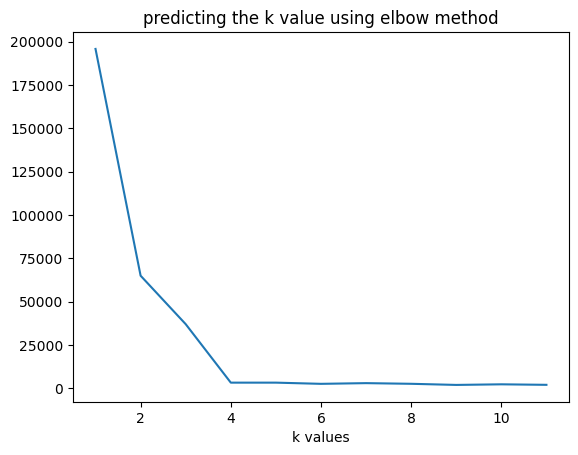

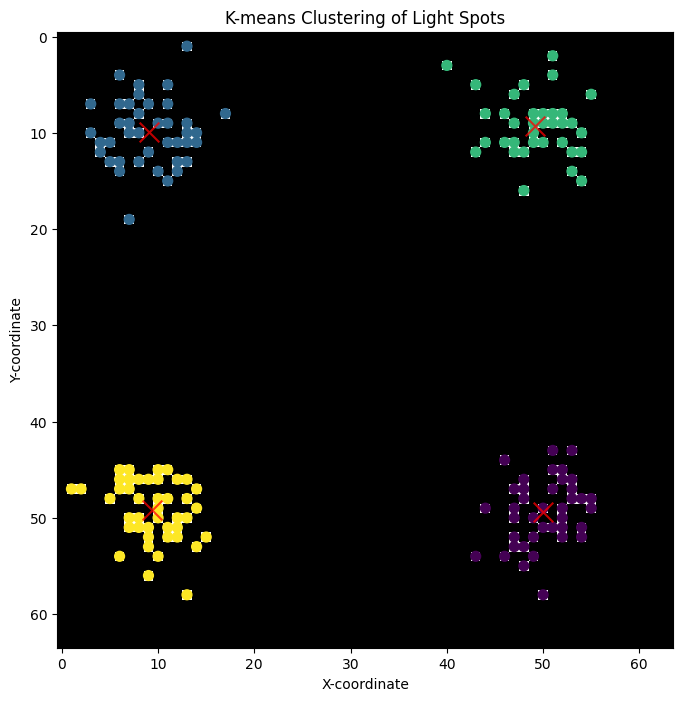

,information,distance
0,Distance between 1 and 2 clusters,56.887094
1,Distance between 1 and 3 clusters,40.137182
2,Distance between 1 and 4 clusters,40.607415
3,Distance between 2 and 3 clusters,40.123840
4,Distance between 2 and 4 clusters,39.261275
5,Distance between 3 and 4 clusters,56.339962


In [4]:
elbowmethod(light_spots,11)
kmeans=kmeansclustering(k=4)
labels=kmeans.fit(light_spots)
city_centers=kmeans.centroids
plt.figure(figsize=(8, 8))
plt.imshow(binary_image, cmap='gray')
plt.scatter(light_spots[:, 1], light_spots[:, 0], c=labels, s=50, cmap='viridis')
plt.scatter(city_centers[:, 1], city_centers[:, 0], c='red', s=200, alpha=0.75,marker='x')#colour of centroids is red for beter visibilty
plt.title("K-means Clustering of Light Spots")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()
b,c=eucdis(city_centers,k=4)# this to find ditance bw each cities(cluster centres)
df=pd.DataFrame({'information':c,'distance':b})#distance is in pixels
df